## Monte Carlo - Euler Discretization - Part II

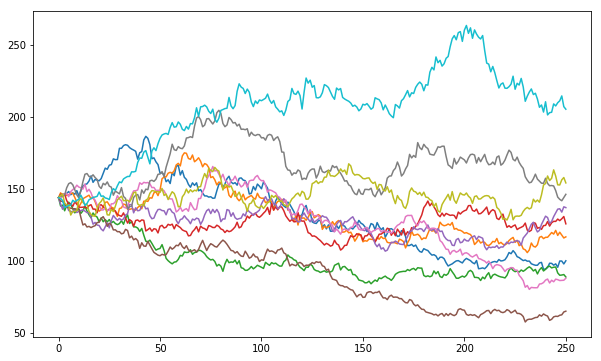

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

ticker = 'MSFT'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2000-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())
stdev = log_returns.std() * 250 ** 0.5
stdev = stdev.values

r = 0.025
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])


plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

In [2]:
p = np.maximum(S[-1] - 110,0)
p

array([ 0.        ,  6.66345173,  0.        , ..., 87.13718395,
       61.10448454, 12.55853476])

In [3]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

39.602805448726315